In [13]:
# Importing the relevant packages

import os
import nifty8 as ift
import numpy as np
import matplotlib.pyplot as pl
import sys
import importlib
import xarray as array
import scipy.stats as st

# Importing the relevant functions from RMInterpol



# Importing the parameters for data generation from the simulation boxes 
# This is not necessary if you are using the pre-existing data 
from Parameters import data_from_simulations_template as pm

# This is for generation of the simulated foreground RM  
from generate_simulated_data import main

## Creating the simulated data
(This can be skipped if you are using the pre-existing data)

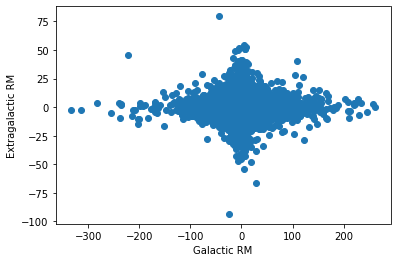

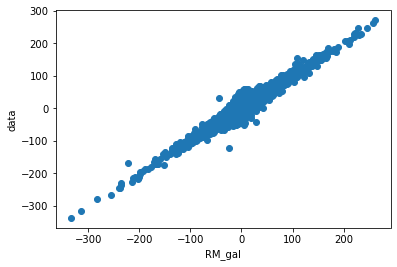

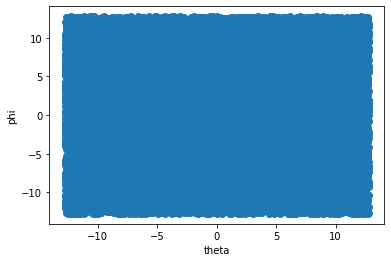

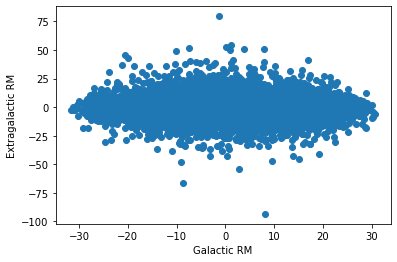

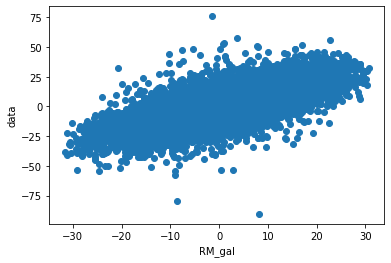

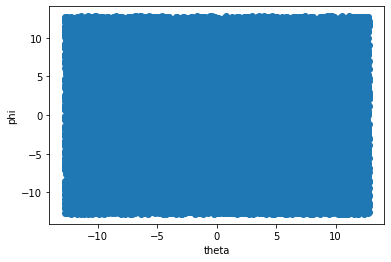

In [2]:
# Generating the simulated data from the simulation boxes. To change the filename, change the  the `data_from_simulations_template` module

simulation_names = ['Results_Filamentary', 'Results_Patchy']


general_parameter_dict = getattr(pm, 'data_params')
domain_dict = getattr(pm, 'domain_params')
egal_dict = getattr(pm, 'extragal_params')
for simulation_name in simulation_names:
    main(**general_parameter_dict, domain_parameters = domain_dict, extragal_params = egal_dict, simulation_name = simulation_name)


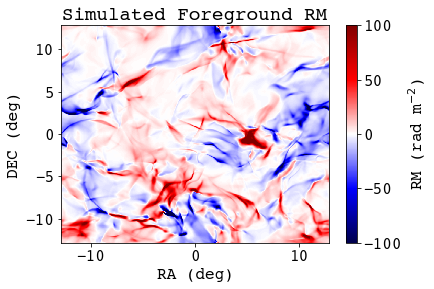

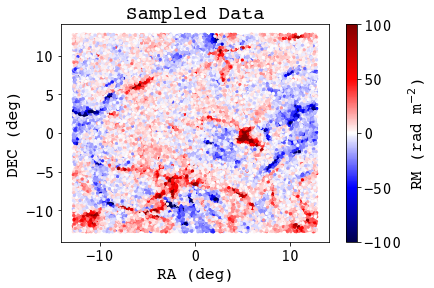

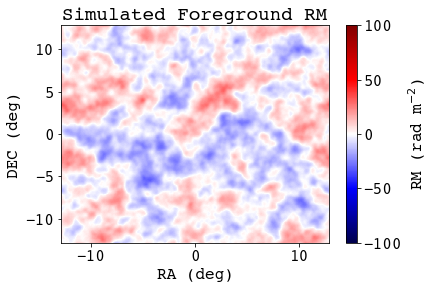

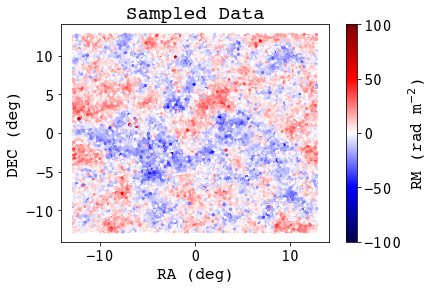

In [17]:
# Plotting the simulated foreground RM
# NOTE: Only a cutout of these RMs is used in the paper to save compuational time but the results easily generalize to the entire patch displayed below
# NOTE: The sampled data includes extragalactic contributions. This can be changed by adjusting 'extragal_params' in the parameter file

paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']
simulation_names = ['Results_Filamentary', 'Results_Patchy']

def Plotting_Foreground(paths, simulation_names):
    """ 
    Function to plot the simulated foreground RM
    
    Parameters
    ----------
    paths: Provides the path to the sampled data 
    simulation_names: Provides the names of the simulated foreground RMs

    Returns
    ---------
    None
    """
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"




    for i in range(len(paths)):
        path = paths[i]
        simulation_name = simulation_names[i]

        data = np.load(path+"data.npy")
        phi = np.load(path+"phi.npy")

        theta =np.load(path+"theta.npy")


        fil_sim = np.load('../Simulations/' + simulation_name +'/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy').transpose()

        x, y = np.linspace(theta.min(), theta.max(), 512), np.linspace(phi.min(), phi.max(), 512)
        funcx, funcy = np.meshgrid(x, y)

        # Plotting the true foreground RM 
        val_min, val_max = -100, 100
        fig1, ax1 = pl.subplots()
        c1 = ax1.pcolormesh(funcx, funcy, fil_sim, cmap='seismic', vmin = val_min, vmax = val_max)
        pl.title('Simulated Foreground RM')
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')


        # Plotting the data we will use
        fig2, ax2 = pl.subplots()
        im2 = ax2.scatter(theta, phi, c = data, cmap='seismic', vmin = -100, vmax = 100, s =5 )
        colorbar2 = fig2.colorbar(im2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        pl.title("Sampled Data")
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
Plotting_Foreground(paths, simulation_names)

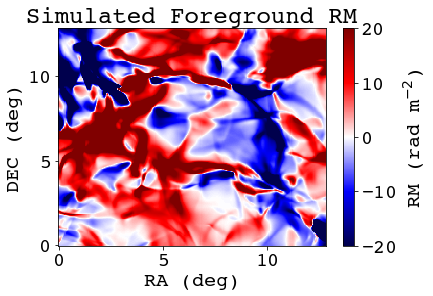

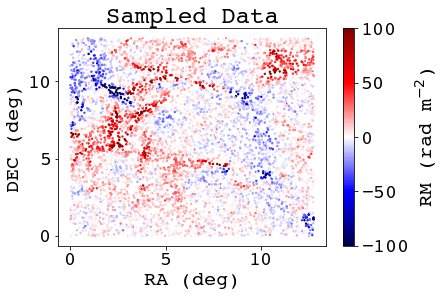

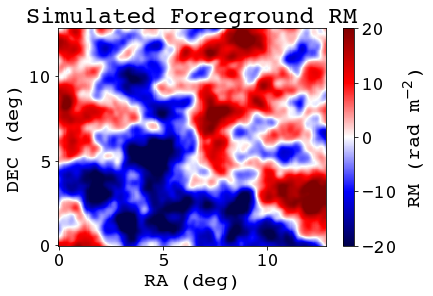

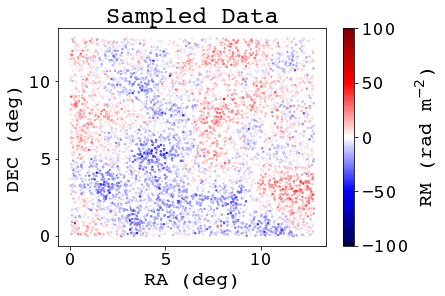

In [79]:
# Here, we will be plotting the cutout that is used in the paper
# NOTE: The sampled data might not be identical to the one used in the paper as the algorithm randomly samples the simulation box each time 


paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']
simulation_names = ['Results_Filamentary', 'Results_Patchy']

def Plotting_Foreground_Cutout(paths, simulation_names, nx = 256, ny = 256):
    """ 
    Function to plot the cutout of the simulated foreground RM
    
    Parameters
    ----------
    paths: Provides the path to the sampled data 
    simulation_names: Provides the names of the simulated foreground RMs

    Returns
    ---------
    None
    """

    for i in range(len(paths)):
        path = paths[i]
        simulation_name = simulation_names[i]

        old_data = np.load(path+"data.npy")
        old_phi = np.load(path+"phi.npy")
        old_theta =np.load(path+"theta.npy")
        old_gal_rm = np.load(path + "gal_rm.npy")
        old_noise_sigma = np.load(path + "noise_sigma.npy")



        old_data_2 = old_data[np.where(old_theta < 0)]
        old_phi_2 = old_phi[np.where(old_theta < 0)]
        old_theta_2 = old_theta[np.where(old_theta < 0)]
        old_gal_rm_2 = old_gal_rm[np.where(old_theta < 0)]
        old_noise_sigma_2 = old_noise_sigma[np.where(old_theta < 0)]



        data = old_data_2[np.where(old_phi_2 < 0)]
        phi = old_phi_2[np.where(old_phi_2 < 0)]
        theta = old_theta_2[np.where(old_phi_2 < 0)]
        gal_rm = old_gal_rm_2[np.where(old_phi_2 < 0)]
        noise_sigma = old_noise_sigma_2[np.where(old_phi_2 < 0)]


        theta = -theta
        phi = -phi


        fil_sim = np.load('../Simulations/' + simulation_name +'/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy').transpose()

        fil_sim_cutout = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(0, theta.max(), nx), np.linspace(0, phi.max(), ny)
        funcx, funcy = np.meshgrid(x, y)

        val_min, val_max = -20, 20
        fig4, ax4 = pl.subplots()
        c4 = ax4.pcolormesh(x, y, fil_sim_cutout, cmap='seismic', vmin = val_min, vmax = val_max)
        pl.title('Simulated Foreground RM')
        colorbar4 = fig4.colorbar(c4, ax = ax4)
        colorbar4.set_label('RM (rad m$^{-2}$)')
        ax4.set_xlabel('RA (deg)')
        ax4.set_ylabel('DEC (deg)')
        ax4.set_yticks((0, 5, 10))

        fig5, ax5 = pl.subplots()
        im5 = ax5.scatter(theta, phi, c = data, cmap='seismic', vmin = -100, vmax = 100, s = 2)
        colorbar5 = fig5.colorbar(im5)
        colorbar5.set_label('RM (rad m$^{-2}$)')
        pl.title("Sampled Data")
        ax5.set_xlabel('RA (deg)')
        ax5.set_ylabel('DEC (deg)')
        ax5.set_yticks((0, 5, 10))

Plotting_Foreground_Cutout(paths, simulation_names)

## Removing Extragalactic RM

In [3]:
from numpy import linalg as l
from scipy import spatial

paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']

def remove_extragal_rm(paths, cutoff = 3):
    """
    Function to remove the extragalactic RM
    
    Parameters
    ----------
    paths: Gives the paths to the sampled data 
    cutoff: The cutoff for removing the extragalactic RM; 3 by default 

    Returns
    --------
    ntheta: The RA of the points after removing the extragalactic RM for both simulations
    nphi: Th DEC of the points after removing the extragalactic RM for both simulations
    data: RM data after removal of extragalactic sources for both simulatons 
    noise: The noise in the RM after the removal of the extragalctic sources for both simulations
    noise_sigma: The deviation in the noise in the RM after removal of the extragalactic sources for both simulations
    """

    ntheta_array = []
    nphi_array = []
    data_array = []
    noise_sigma_array = []
    noise_array = []
    for path in paths:
        
        old_data = np.load(path+"data.npy")
        old_phi = np.load(path+"phi.npy")
        old_theta =np.load(path+"theta.npy")
        old_gal_rm = np.load(path + "gal_rm.npy")
        old_noise_sigma = np.load(path + "noise_sigma.npy")
        old_noise = np.load(path + "noise.npy")



        old_data_2 = old_data[np.where(old_theta < 0)]
        old_phi_2 = old_phi[np.where(old_theta < 0)]
        old_theta_2 = old_theta[np.where(old_theta < 0)]
        old_gal_rm_2 = old_gal_rm[np.where(old_theta < 0)]
        old_noise_sigma_2 = old_noise_sigma[np.where(old_theta < 0)]
        old_noise_2 = old_noise[np.where(old_theta<0)]



        data = old_data_2[np.where(old_phi_2 < 0)]
        phi = old_phi_2[np.where(old_phi_2 < 0)]
        theta = old_theta_2[np.where(old_phi_2 < 0)]
        gal_rm = old_gal_rm_2[np.where(old_phi_2 < 0)]
        noise_sigma = old_noise_sigma_2[np.where(old_phi_2 < 0)]
        noise = old_noise_2[np.where(old_phi_2 < 0)]


        theta = -theta
        phi = -phi

        #Loading the data

        points= np.vstack((theta, phi))
        points = np.transpose(points)




        #Code to find he nearest 10 neighbours of a given data point

        i = 0
        while i < len(data):
            currentdata = np.delete(data, i)
            currentnoise_sigma = np.delete(noise_sigma, i)
            currentnoise = np.delete(noise, i)
            currentpts = np.delete(points, i, 0)
            currentpoint = points[i]
            rmlist = np.zeros((10))
            counter = 0 
            for j in range(10):
                distance,index = spatial.KDTree(currentpts).query(currentpoint)
                rmlist[counter] = currentdata[index]
                currentdata = np.delete(currentdata, index, 0)
                currentnoise_sigma = np.delete(currentnoise_sigma, index, 0)
                currentnoise = np.delete(currentnoise, index, 0)
                currentpts = np.delete(currentpts, index, 0)
                counter = counter + 1
            mean = np.mean(rmlist)
            std = np.std(rmlist)
            if data[i] >= (mean+3*std) or data[i]<=(mean - 3*std):
                data = np.delete(data, i)
                noise_sigma = np.delete(noise_sigma, i)
                noise = np.delete(noise, i)
                points = np.delete(points, i, 0)
            i = i + 1 


        ntheta = points[: , 0] 
        nphi = points[:, 1] 

        ntheta_array.append(ntheta)
        nphi_array.append(nphi)
        data_array.append(data)
        noise_sigma_array.append(noise_sigma)
        noise_array.append(noise)

        if 'patchy' in path:
            np.save('Data/simulated_cutout_patchy/test/data.npy', data)
            np.save('Data/simulated_cutout_patchy/test/theta.npy', ntheta)
            np.save('Data/simulated_cutout_patchy/test/phi.npy', nphi)
            np.save('Data/simulated_cutout_patchy/test/noise.npy', noise)
            np.save('Data/simulated_cutout_patchy/test/noise_sigma.npy', noise_sigma)
        elif 'fil' in path: 
            np.save('Data/simulated_cutout_fil/test/data.npy', data)
            np.save('Data/simulated_cutout_fil/test/theta.npy', ntheta)
            np.save('Data/simulated_cutout_fil/test/phi.npy', nphi)
            np.save('Data/simulated_cutout_fil/test/noise.npy', noise)
            np.save('Data/simulated_cutout_fil/test/noise_sigma.npy', noise_sigma)
        else: 
            np.save('Data/simulated_cutout_example/test/data.npy', data)
            np.save('Data/simulated_cutout_example/test/theta.npy', ntheta)
            np.save('Data/simulated_cutout_example/test/phi.npy', nphi)
            np.save('Data/simulated_cutout_example/test/noise.npy', noise)
            np.save('Data/simulated_cutout_example/test/noise_sigma.npy', noise_sigma)
    return ntheta_array, nphi_array, data_array, noise_array, noise_sigma_array

ntheta_array, nphi_array, data_array, noise_array, noise_sigma_array = remove_extragal_rm(paths)    

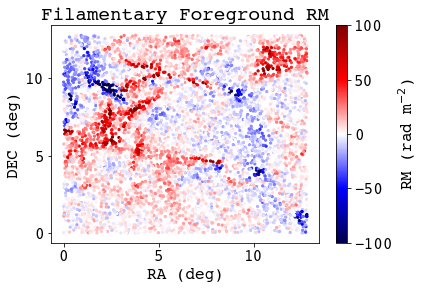

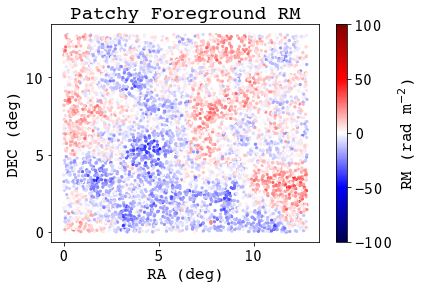

In [10]:
# Plotting the sampled data after filtering the extragalacitc RM 
ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']
load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))
pl.rcParams.update({'font.size': 16})
plot_names = ['Filamentary Foreground RM', 'Patchy Foreground RM']
grid_names =['fil', 'patchy']
for i in range(len(ntheta_array)): 
    fig6, ax6 = pl.subplots()
    im6 = ax6.scatter(ntheta_array[i], nphi_array[i], c = data_array[i], cmap='seismic', vmin = -100, vmax = 100, s =5 )
    colorbar6 = fig6.colorbar(im6)
    colorbar6.set_label('RM (rad m$^{-2}$)')
    pl.title(plot_names[i])
    ax6.set_xlabel('RA (deg)')
    ax6.set_ylabel('DEC (deg)')
    ax6.set_yticks((0, 5, 10))
    pl.savefig('./Figs/'+grid_names[i] + '_sample.png', dpi = 300, bbox_inches = 'tight')


In [90]:
# Here, we will check that the algorithm did remove some data points

for i in range(len(paths)): 
    print(len(ntheta_array[i]))
    path = paths[i]
    old_data = np.load(path+"data.npy")
    old_phi = np.load(path+"phi.npy")
    old_theta =np.load(path+"theta.npy")
    old_gal_rm = np.load(path + "gal_rm.npy")
    old_noise_sigma = np.load(path + "noise_sigma.npy")



    old_data_2 = old_data[np.where(old_theta < 0)]
    old_phi_2 = old_phi[np.where(old_theta < 0)]
    old_theta_2 = old_theta[np.where(old_theta < 0)]
    old_gal_rm_2 = old_gal_rm[np.where(old_theta < 0)]
    old_noise_sigma_2 = old_noise_sigma[np.where(old_theta < 0)]



    data_sim = old_data_2[np.where(old_phi_2 < 0)]
    phi_sim = old_phi_2[np.where(old_phi_2 < 0)]
    theta_sim = old_theta_2[np.where(old_phi_2 < 0)]
    gal_rm_sim = old_gal_rm_2[np.where(old_phi_2 < 0)]
    noise_sigma_sim = old_noise_sigma_2[np.where(old_phi_2 < 0)]

    theta_sim  = -theta_sim
    phi_sim = - phi_sim 

    print(len(theta_sim))

# According to the algorithm used, there are more points with extragalactic contributions in the patchy foreground RM cutout. 

6436
6586
6310
6509


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


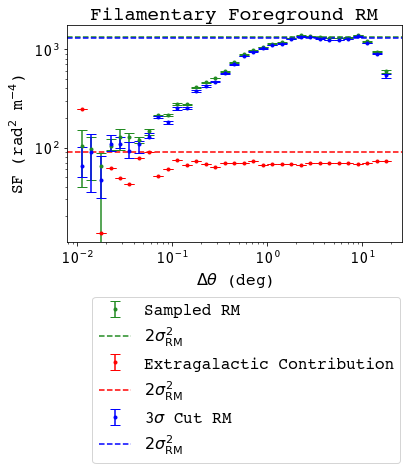

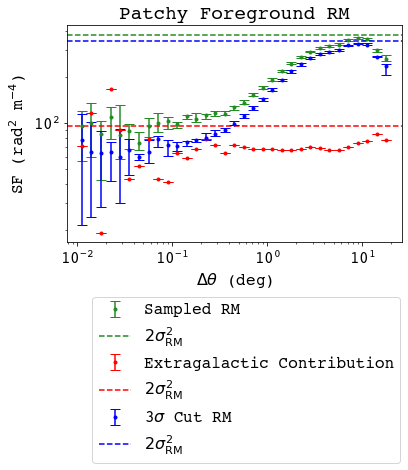

In [91]:
# Here, we will plot the 2 point structure functions using the structurefunction package from Alec Thomson
# Note: You might need to downgrade your numpy version to make the structurefunction package work 

from structurefunction import structure_function
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u 
def Plotting_Structure_Functions(n_point = 2):
    # Note: We will be assuming a zero error in all RM maps
    ''' 
    Function to plot the structure functions of the simulated RM maps, the extragalactic RMs and the residuals
    Parameters
    ----------
    n_point: Integer that refers to the number of points in the stencil; currently only n_points = 2 and n_points = 3 is supported by structurefunction
    
    Returns
    --------
    None
    '''

    from typing import Union
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"
    # Loading in the interpolated RM maps 

    def nanvar(data: Union[np.ndarray, u.Quantity]) -> Union[np.ndarray, u.Quantity]:
        """Compute the variance of an array, ignoring NaNs

        Args:
            data (Union[np.ndarray, u.Quantity]): Array

        Returns:
            Union[np.ndarray, u.Quantity]: Variance
        """

        mask = ~np.isfinite(data)
        return np.var(data[~mask])
    # Here, we will load in the coordinates and turn the arrays into a form that structurefunction can work with, i.e, (ra, dec) coordinatates with corresponding RN values
    # and setting err_RM = 0


    paths = ['Data/simulated_fil/test/', 'Data/simulated_patchy/test/']
    cutout_paths = ['Data/simulated_cutout_fil/test/', 'Data/simulated_cutout_patchy/test/']
    grid_names = ['fil', 'patchy']

    plot_names = ['Filamentary Foreground RM', 'Patchy Foreground RM']
    for i in range(len(paths)):
        path = paths[i]
        cut_path = cutout_paths[i]

        old_data = np.load(path+"data.npy")
        old_phi = np.load(path+"phi.npy")
        old_theta =np.load(path+"theta.npy")
        old_egal_rm = np.load(path + "extragal_rm.npy", allow_pickle = True)
        old_rm_noise = np.load(path + "noise.npy")
        old_egal_noise = np.load(path + "extragal_sigma.npy", allow_pickle = True)

        old_data_2 = old_data[np.where(old_theta < 0)]
        old_phi_2 = old_phi[np.where(old_theta < 0)]
        old_theta_2 = old_theta[np.where(old_theta < 0)]
        old_egal_rm_2 = old_egal_rm[np.where(old_theta < 0)]
        old_rm_noise_2 = old_rm_noise[np.where(old_theta < 0)]
        old_egal_noise_2 = old_egal_noise[np.where(old_theta < 0)]

        data = old_data_2[np.where(old_phi_2 < 0)]
        phi = old_phi_2[np.where(old_phi_2 < 0)]
        theta = old_theta_2[np.where(old_phi_2 < 0)]
        egal_rm = old_egal_rm_2[np.where(old_phi_2 < 0)]
        rm_noise = old_rm_noise_2[np.where(old_phi_2 < 0)]
        egal_noise = old_egal_noise_2[np.where(old_phi_2 < 0)]

        theta = -theta
        phi = -phi

        cut_data = np.load(cut_path + "data.npy")
        cut_theta = np.load(cut_path + "theta.npy")
        cut_phi = np.load(cut_path  + "phi.npy")
        cut_rm_noise = np.load(cut_path + "noise.npy")


        points = np.vstack((theta, phi)).T 
        points_astro = []

        for point in points:
            points_astro.append(SkyCoord(point[0], point[1], unit = 'deg'))

        cut_points = np.vstack((cut_theta, cut_phi)).T
        cut_points_astro = []
        for cut_point in cut_points:
            cut_points_astro.append(SkyCoord(cut_point[0], cut_point[1], unit ='deg'))
        sim_tab = Table()
        
        sim_tab.add_column(points_astro, name = 'coords')
        sim_tab.add_column(data, name = 'RM')
        sim_tab.add_column(rm_noise, name = 'e_RM')
        sim_tab.add_column(egal_rm, name = 'egal_RM')
        sim_tab.add_column(egal_noise, name = 'err_egal_RM')

        cut_tab = Table()
        cut_tab.add_column(cut_points_astro, name = 'cut_coords')
        cut_tab.add_column(cut_data, name = 'cut_RM')
        cut_tab.add_column(cut_rm_noise, name = 'cut_e_RM')

        start = -2
        stop = 1.5
        step = 0.1
        bins = 10**np.arange(start, stop+step, step)*u.deg

        data_sf, _  = structure_function(data = sim_tab['RM'] * (u.rad/u.m**2), errors = sim_tab['e_RM'] * (u.rad/u.m**2), coords = sim_tab['coords'], 
                                                    samples = 10, bins=bins, show_plots=False, verbose=False, n_point = n_point) 

        egal_sf, _ = structure_function(data = sim_tab['egal_RM'] * (u.rad/u.m**2), errors = sim_tab['err_egal_RM'] * (u.rad/u.m**2), coords = sim_tab['coords'], 
                                                    samples = 1, bins  = bins, show_plots = False, verbose = False, n_point = n_point)
        cut_sf, _  = structure_function(data = cut_tab['cut_RM'] * (u.rad/u.m**2), errors = cut_tab['cut_e_RM'] * (u.rad/u.m**2), coords = cut_tab['cut_coords'], 
                                                    samples = 10, bins=bins, show_plots=False, verbose=False, n_point = n_point) 
        colors = ['forestgreen', 'red', 'blue']
        fig, ax = pl.subplots()
        med = data_sf[0]
        err_low = data_sf[1]
        err_high = data_sf[2]
        c_bins = data_sf[-1]

        ax.errorbar(c_bins, med, yerr = (err_low, err_high), label = 'Sampled RM', color = colors[0], fmt = '.', capsize = 5)

        ax.axhline(2 * np.var(sim_tab['RM'][~np.isnan(sim_tab['RM'])]), linestyle = '--', color = colors[0], label = '$2\sigma_{\mathrm{RM}}^2$')

        med = egal_sf[0]
        err_low = egal_sf[1]
        err_high = egal_sf[2]
        c_bins = egal_sf[-1]

        ax.errorbar(c_bins, med, yerr = (err_low, err_high), label = 'Extragalactic Contribution', color = colors[1], fmt = '.', capsize = 5)

        ax.axhline(2 *np.var(sim_tab['egal_RM'][~np.isnan(sim_tab['egal_RM'])]), linestyle = '--', color = colors[1], label = '$2\sigma_{\mathrm{RM}}^2$')

        med = cut_sf[0]
        err_low = cut_sf[1]
        err_high = cut_sf[2]
        c_bins = cut_sf[-1]

        ax.errorbar(c_bins, med, yerr = (err_low, err_high), label = '3$\sigma$ Cut RM', color = colors[2], fmt = '.', capsize = 5)

        ax.axhline(2 * np.var(cut_tab['cut_RM'][~np.isnan(cut_tab['cut_RM'])]), linestyle = '--', color = colors[2], label = '$2\sigma_{\mathrm{RM}}^2$')

        ax.set_title(plot_names[i])
        ax.set_xlabel('$\Delta \\theta$ (deg)')
        ax.set_ylabel('SF (rad$^2$ m$^{-4}$)')
        handles, labels = pl.gca().get_legend_handles_labels()
        order = [3, 0, 4, 1, 5, 2]
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor = (1.02, -1.05), loc = 'lower right')
        ax.loglog()
        pl.savefig('./Figs/' + 'struc_func_' + grid_names[i] + '.png', bbox_inches = 'tight')
        pl.show()
    return


Plotting_Structure_Functions()

## Interpolation schemes

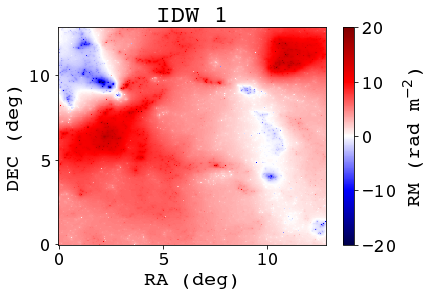

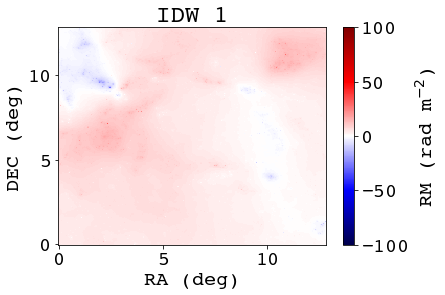

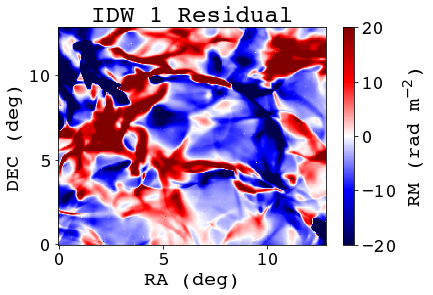

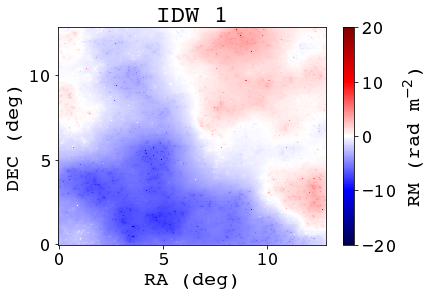

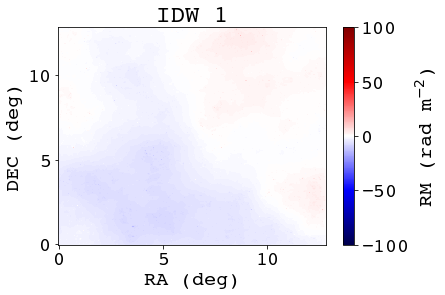

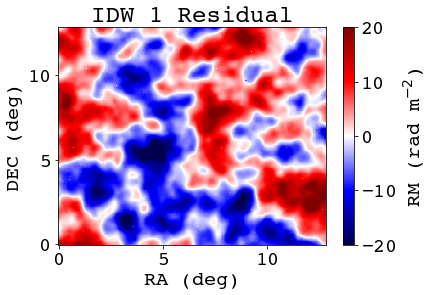

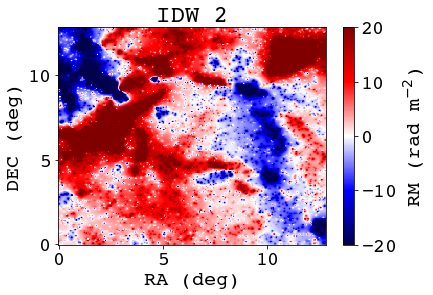

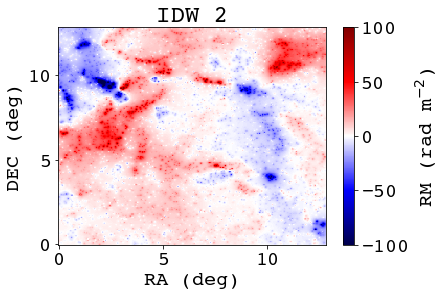

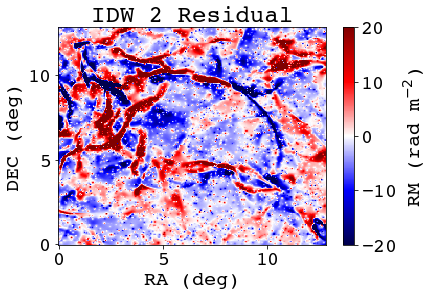

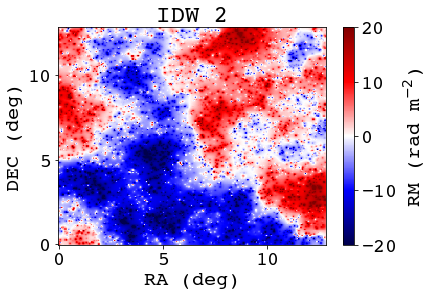

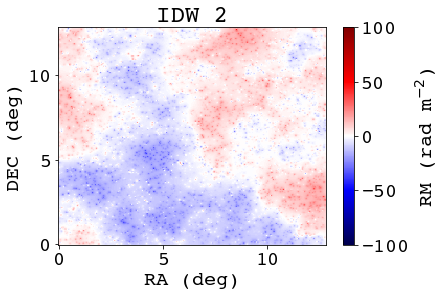

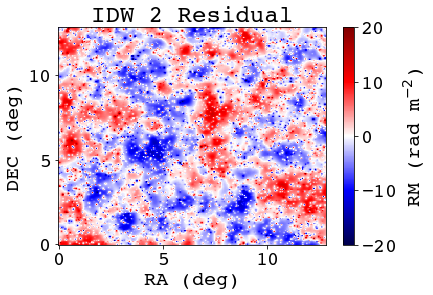

In [2]:
# Running this block of code will take a while

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']
load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


def IDW_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, p, nx = 256, ny = 256, return_arrays = True): 
    """  
    Function to test IDW interpolation for a foreground RM patch

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    p: Float that sets the power parameter of the IDW interpolation
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_IDW_array: List of NNI interpolation results for each grid
    """

    val_IDW_array = []
    plot_path = './Figs/'
    
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    def IDW(x, sample, test, p): 
            '''
            Function to compute the IDW interpolation value at a point in the interpolation region

            Parameters
            ----------
            x: Array of RA and DEC coordinates of the interpolation point
            sample: Array of RA and DEC coordinates of data points
            test: Array of RM values of data points
            p: Float that sets the power parameter of the IDW interpolation 

            Returns
            -------
            y: Float of interpolated RM value at the interpolation point 
            '''
            w1 = np.array([])
            darray = np.array([])
            y = 0 
            for i in range(len(sample[:, 1])):
                d0 = np.subtract.outer(x[0], sample[i, 0])
                d1 = np.subtract.outer(x[1], sample[i, 1])
                d = np.hypot(d0, d1)
                darray = np.append(darray, d)
                if d == 0: 
                    y = data[i]
                else: 
                    w1 = np.append(w1, (1/d)**p)
            if np.all(darray != 0): 
                y = np.sum(w1*test)/np.sum(w1)
            return y 
    
    for i in range(len(ntheta_array)):
        # Loading the simulation data
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        points = np.vstack((ntheta, nphi))
        points = np.transpose(points)

        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)
        funcx, funcy = np.meshgrid(x, y)

        # Performing IDW interpolation
        
        val_IDW = np.zeros((ny, nx))
        for i in range(ny):
            x = funcx[0][i]
            for j in range(nx):
                y = funcy[j][0]
                val_IDW[i][j] = IDW(np.array([x, y]), points, data, p)

        val_IDW = val_IDW.transpose()


        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/IDW{}.npy'.format(str(p)), val_IDW)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/IDW{}.npy'.format(str(p)), val_IDW)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/IDW{}.npy'.format(str(p)), val_IDW)
            grid_name = 'example'


        fig1, ax1 = pl.subplots()
        pl.title( "IDW " + str(p))
        val_min, val_max = -20, 20
        c1 = ax1.pcolormesh(funcx, funcy, val_IDW, cmap='seismic', vmin=val_min, vmax=val_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"IDW"+str(p) + "_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()
        
        fig2, ax2 = pl.subplots()
        pl.title( "IDW " + str(p))
        val_min, val_max = -100, 100
        c2 = ax2.pcolormesh(funcx, funcy, val_IDW, cmap='seismic', vmin=val_min, vmax=val_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"IDW"+str(p) + "_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig3, ax3 = pl.subplots()
        pl.title( "IDW {} Residual".format(str(p)))
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_IDW), cmap = 'seismic', vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"IDW"+str(p) + "_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_IDW_array.append(val_IDW)
    
    if return_arrays:
        return val_IDW_array
    else: 
        return

val_IDW1_array = IDW_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, p = 1)
val_IDW2_array = IDW_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, p = 2)


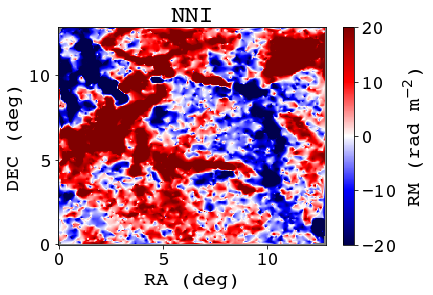

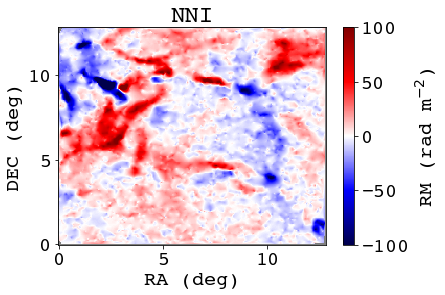

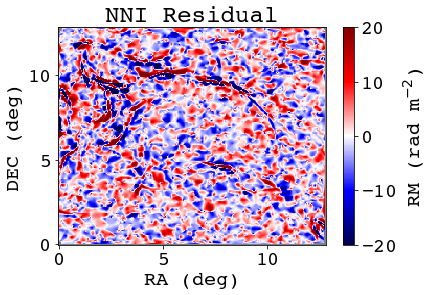

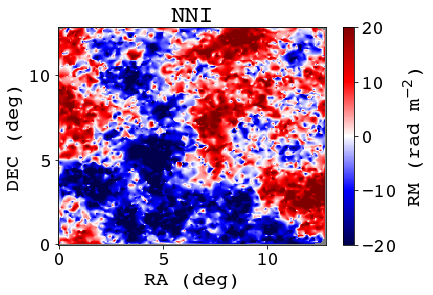

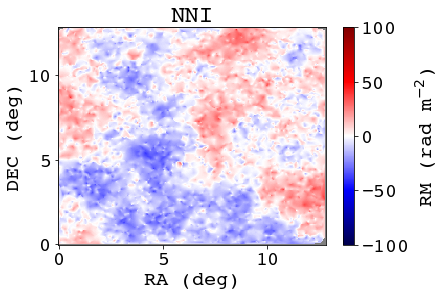

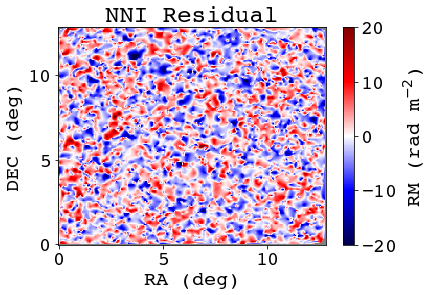

In [3]:
# Testing with NNI interpolation 

from metpy.interpolate import natural_neighbor_to_grid

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []
simulation_names = ['Results_Filamentary', 'Results_Patchy']

load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def NNI_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, nx = 256, ny = 256, return_arrays = True):
    """  
    Function to test NNI interpolation for a foreground RM sky

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_NNI_array: List of NNI interpolation results for each grid
    """
    val_NNI_array = []
    plot_path = './Figs/'

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    for i in range(len(ntheta_array)):
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

        sim_gridx = np.array(np.meshgrid(x, y)).T.reshape(-1,2)[:,0]
        sim_gridy = np.array(np.meshgrid(x, y)).T.reshape(-1,2) [:, 1]

        # Performing the NNI interpolation

        val_NNI = natural_neighbor_to_grid(ntheta, nphi, data, sim_gridx, sim_gridy)

        val_NNI = val_NNI.reshape(nx, ny).T

        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/NNI.npy', val_NNI)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/NNI.npy', val_NNI)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/NNI.npy', val_NNI)
            grid_name = 'example'
        
        # Plotting the results

        funcx, funcy = np.meshgrid(x, y)

        cmap = pl.cm.get_cmap('seismic').copy()
        cmap.set_bad('gray')

        fig1, ax1 = pl.subplots()
        pl.title("NNI")
        val_min, val_max = -20, 20
        c1 = ax1.pcolormesh(funcx, funcy, val_NNI, cmap=cmap, vmin=val_min, vmax=val_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"NNI_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig2, ax2 = pl.subplots()
        pl.title("NNI")
        val_min, val_max = -100, 100

        c2 = ax2.pcolormesh(funcx, funcy, val_NNI, cmap=cmap, vmin=val_min, vmax=val_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"NNI_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()


        # Plotting the residuals for NNI

        fig3, ax3 = pl.subplots()
        pl.title( "NNI Residual")
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_NNI), cmap = cmap, vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"NNI_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_NNI_array.append(val_NNI)
       
    if return_arrays:
        return val_NNI_array
    else: 
        return
    
val_NNI_array = NNI_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths)

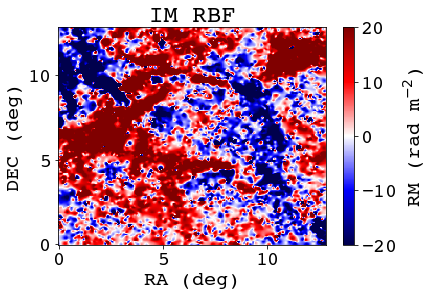

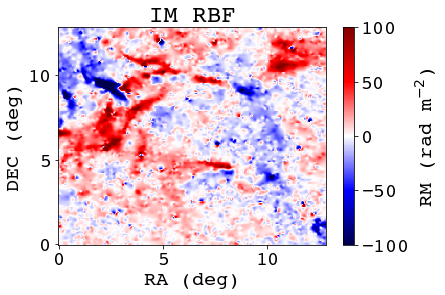

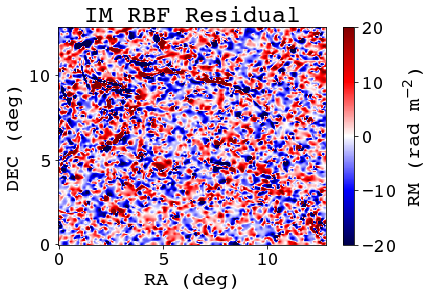

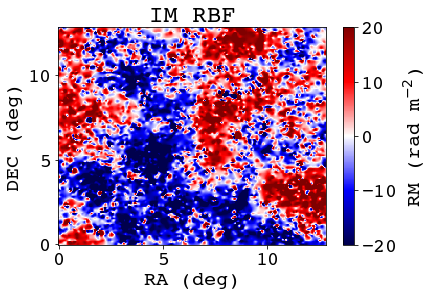

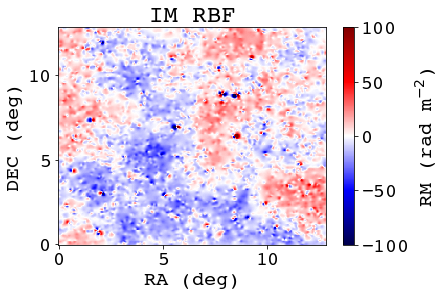

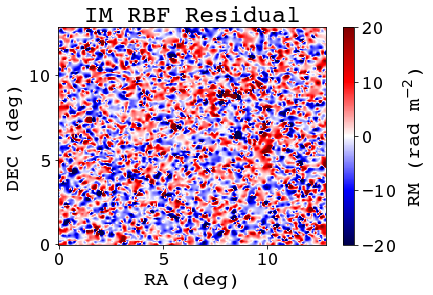

In [92]:
# Testing with IM interpolation 

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# This is needed to prevent the kernel from crashing for large data sets
from scipy.interpolate import Rbf

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []

load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def IM_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, epsilon = 0.1, nx = 256, ny = 256, return_arrays = True):
    """  
    Function to test IM interpolation for a foreground RM sky

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    epsilon: Float that controls the shape parameter; 1 by default 
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_IM_array: List of IM interpolation results for each grid
    """
    val_IM_array = []
    plot_path = './Figs/'

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    for i in range(len(ntheta_array)):
        # Loading in the data
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

        # Performing the IM interpolation 
        rbf = Rbf(ntheta, nphi, data, function = 'inverse', epsilon = epsilon)
        ti = np.linspace(ntheta.min(), ntheta.max(), nx)
        pi = np.linspace(nphi.min(), nphi.max(), ny)

        xi, yi = np.meshgrid(ti, pi)

        val_IM  = rbf(xi, yi)

        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/IM.npy', val_IM)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/IM.npy', val_IM)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/IM.npy', val_IM)
            grid_name = 'example'

        fig1, ax1 = pl.subplots()
        pl.title( "IM RBF")
        valRBF_min, valRBF_max = -20, 20
        c1 = ax1.pcolormesh(xi, yi, val_IM, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"IM_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        # Plotting the results 
        funcx, funcy = np.meshgrid(x, y)
        

        fig2, ax2 = pl.subplots()
        pl.title( "IM RBF")
        valRBF_min, valRBF_max = -100, 100
        c2 = ax2.pcolormesh(xi, yi, val_IM, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"IM_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig3, ax3 = pl.subplots()
        pl.title( "IM RBF Residual")
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_IM), cmap = 'seismic', vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"IM_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_IM_array.append(val_IM)

    if return_arrays:
        return val_IM_array
    else: 
        return

val_IM_array = IM_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths)
    

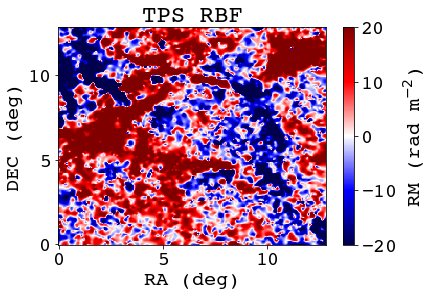

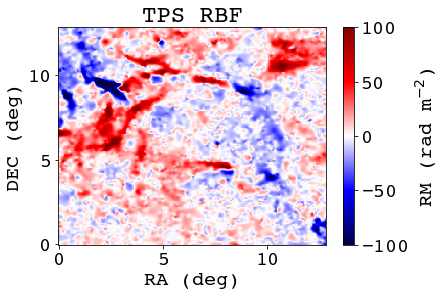

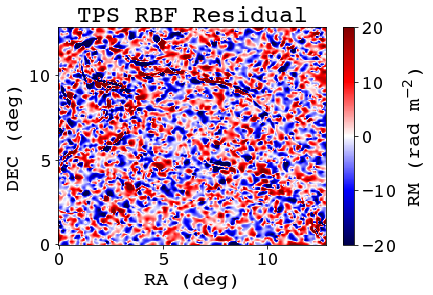

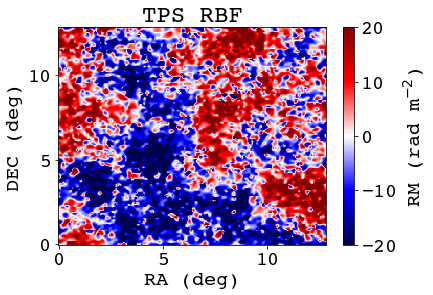

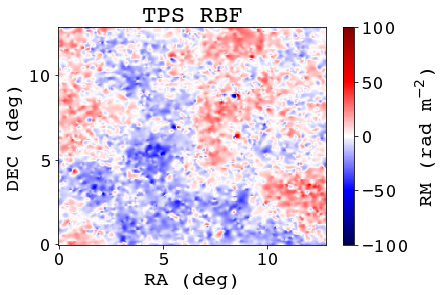

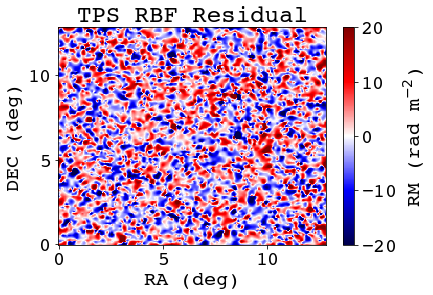

In [95]:
# Testing with TPS interpolation 

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# This is needed to prevent the kernel from crashing for large data sets

from scipy.interpolate import Rbf

ntheta_array = []
nphi_array = []
data_array = []
noise_sigma_array = []

load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))
    data_array.append(np.load(path + 'data.npy'))
    noise_sigma_array.append(np.load(path + 'noise_sigma.npy'))

plot_path  = './Figs/'
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def TPS_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths, epsilon = 0.1, nx = 256, ny = 256, return_arrays = True):
    """  
    Function to test IM interpolation for a foreground RM sky

    Parameters
    ----------
    ntheta_array: Arrays of RA values of the data points
    nphi_array: Arrays of DEC values of the data points
    data_array: Arrays of the RM values of the data points 
    simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
    load_paths: List of strings that gives the paths to the sampled data
    epsilon: Float that controls the shape parameter; 1 by default 
    nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
    return_arrays: Boolean to control the return of data; True by default

    Returns
    --------
    val_TPS_array: List of TPS interpolation results for each grid
    """
    val_TPS_array = []
    plot_path = './Figs/'

    if not os.path.exists(plot_path):
        os.makedirs(plot_path)

    for i in range(len(ntheta_array)):
        # Loading in the data
        ntheta = ntheta_array[i]
        nphi = nphi_array[i]
        data = data_array[i]
        path = load_paths[i]
        simulation_path = simulation_paths[i]

        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

        x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

        # Performing the IM interpolation 
        rbf = Rbf(ntheta, nphi, data, function = 'thin_plate', epsilon = epsilon)
        ti = np.linspace(ntheta.min(), ntheta.max(), nx)
        pi = np.linspace(nphi.min(), nphi.max(), ny)

        xi, yi = np.meshgrid(ti, pi)

        val_TPS  = rbf(xi, yi)

        if 'patchy' in path: 
            np.save('./Results/Patchy_Sky/TPS.npy', val_TPS)
            grid_name = 'patchy'

        elif 'fil' in path: 
            np.save('./Results/Fil_Sky/TPS.npy', val_TPS)
            grid_name = 'fil'

        else: 
            np.save('./Results/Example/TPS.npy', val_TPS)
            grid_name = 'example'

        fig1, ax1 = pl.subplots()
        pl.title( "TPS RBF")
        valRBF_min, valRBF_max = -20, 20
        c1 = ax1.pcolormesh(xi, yi, val_TPS, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar1 = fig1.colorbar(c1, ax = ax1)
        colorbar1.set_label('RM (rad m$^{-2}$)')
        ax1.set_xlabel('RA (deg)')
        ax1.set_ylabel('DEC (deg)')
        ax1.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"TPS_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        # Plotting the results 
        funcx, funcy = np.meshgrid(x, y)
        

        fig2, ax2 = pl.subplots()
        pl.title( "TPS RBF")
        valRBF_min, valRBF_max = -100, 100
        c2 = ax2.pcolormesh(xi, yi, val_TPS, cmap='seismic', vmin=valRBF_min, vmax=valRBF_max)
        colorbar2 = fig2.colorbar(c2, ax = ax2)
        colorbar2.set_label('RM (rad m$^{-2}$)')
        ax2.set_xlabel('RA (deg)')
        ax2.set_ylabel('DEC (deg)')
        ax2.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"TPS_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        fig3, ax3 = pl.subplots()
        pl.title( "TPS RBF Residual")
        val_min, val_max = -20, 20
        c3 = ax3.pcolormesh(funcx, funcy, (fil_sim-val_TPS), cmap = 'seismic', vmin = val_min, vmax = val_max)
        colorbar3 = fig3.colorbar(c3, ax = ax3)
        colorbar3.set_label('RM (rad m$^{-2}$)')
        ax3.set_xlabel('RA (deg)')
        ax3.set_ylabel('DEC (deg)')
        ax3.set_yticks((0, 5, 10))
        pl.savefig(plot_path+"TPS_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
        pl.show()

        val_TPS_array.append(val_TPS)

    if return_arrays:
        return val_TPS_array
    else: 
        return

val_TPS_array = TPS_plotting(ntheta_array, nphi_array, data_array, simulation_paths, load_paths)
    

sampler: Iteration #0 energy=1.521459E+14 diff=1.521459E+14 crit=1.0E-07 clvl=0
sampler: Iteration #1 energy=2.120877E+13 diff=1.309372E+14 crit=1.0E-07 clvl=0
sampler: Iteration #2 energy=1.663205E+13 diff=4.576725E+12 crit=1.0E-07 clvl=0
sampler: Iteration #3 energy=1.416421E+13 diff=2.467834E+12 crit=1.0E-07 clvl=0
sampler: Iteration #4 energy=1.238891E+13 diff=1.775307E+12 crit=1.0E-07 clvl=0
sampler: Iteration #5 energy=9.185510E+12 diff=3.203396E+12 crit=1.0E-07 clvl=0
sampler: Iteration #6 energy=6.435873E+12 diff=2.749637E+12 crit=1.0E-07 clvl=0
sampler: Iteration #7 energy=4.841883E+12 diff=1.593990E+12 crit=1.0E-07 clvl=0
sampler: Iteration #8 energy=3.685567E+12 diff=1.156317E+12 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=3.005683E+12 diff=6.798830E+11 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=2.981196E+12 diff=2.448756E+10 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=2.511918E+12 diff=4.692784E+11 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=2.120141

Starting global iteration #0


sampler: Iteration #14 energy=1.805542E+12 diff=1.998212E+10 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=1.677588E+12 diff=1.279542E+11 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=1.627089E+12 diff=5.049863E+10 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=1.468025E+12 diff=1.590649E+11 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=1.218492E+12 diff=2.495327E+11 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=1.048367E+12 diff=1.701252E+11 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=1.034003E+12 diff=1.436331E+10 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=9.247929E+11 diff=1.092104E+11 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=7.793917E+11 diff=1.454013E+11 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=6.892811E+11 diff=9.011054E+10 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=6.692574E+11 diff=2.002369E+10 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=6.657754E+11 diff=3.482009E+09 crit=1.0E-07 clvl=0
sampler: Iteration #26 energ

Starting global iteration #1


sampler: Iteration #13 energy=-7.468321E+04 diff=4.227397E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-7.489197E+04 diff=2.087617E+02 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.493303E+04 diff=4.106285E+01 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.523404E+04 diff=3.010047E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.523498E+04 diff=9.423674E-01 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.549551E+04 diff=2.605294E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.569145E+04 diff=1.959444E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.583831E+04 diff=1.468538E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.586075E+04 diff=2.244270E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.586269E+04 diff=1.940278E+00 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.598381E+04 diff=1.211214E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.617562E+04 diff=1.918069E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #2


sampler: Iteration #13 energy=-7.404916E+04 diff=4.452943E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-7.421122E+04 diff=1.620547E+02 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.476792E+04 diff=5.567037E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.509277E+04 diff=3.248429E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.519137E+04 diff=9.860299E+01 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.536755E+04 diff=1.761857E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.565091E+04 diff=2.833597E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.582313E+04 diff=1.722123E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.593203E+04 diff=1.088992E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.612236E+04 diff=1.903336E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.613018E+04 diff=7.822608E+00 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.629369E+04 diff=1.635092E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #3


sampler: Iteration #14 energy=-7.020318E+04 diff=3.636325E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.095571E+04 diff=7.525311E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.164240E+04 diff=6.866897E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.211297E+04 diff=4.705617E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.281912E+04 diff=7.061525E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.282306E+04 diff=3.941454E+00 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.326436E+04 diff=4.413021E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.380165E+04 diff=5.372923E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.409808E+04 diff=2.964288E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.412284E+04 diff=2.475225E+01 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.417156E+04 diff=4.872859E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.417194E+04 diff=3.741644E-01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #4


sampler: Iteration #17 energy=-7.038031E+04 diff=7.883040E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.126280E+04 diff=8.824951E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.126368E+04 diff=8.800642E-01 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.198209E+04 diff=7.184072E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.258874E+04 diff=6.066532E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.284945E+04 diff=2.607079E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.298097E+04 diff=1.315192E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.306456E+04 diff=8.359082E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.306637E+04 diff=1.813226E+00 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.343183E+04 diff=3.654548E+02 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.377166E+04 diff=3.398328E+02 crit=1.0E-07 clvl=0
sampler: Iteration #28 energy=-7.412226E+04 diff=3.505985E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #5


sampler: Iteration #15 energy=-6.780459E+04 diff=1.390582E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.888908E+04 diff=1.084485E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-6.989741E+04 diff=1.008333E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.068271E+04 diff=7.852987E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.068696E+04 diff=4.246965E+00 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.144842E+04 diff=7.614607E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.147217E+04 diff=2.375575E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.214694E+04 diff=6.747670E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.272679E+04 diff=5.798495E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.307724E+04 diff=3.504511E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.307856E+04 diff=1.315948E+00 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.320998E+04 diff=1.314288E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #6


sampler: Iteration #11 energy=-6.428264E+04 diff=1.000416E+03 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-6.549996E+04 diff=1.217324E+03 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-6.565943E+04 diff=1.594685E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-6.567213E+04 diff=1.269359E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.732683E+04 diff=1.654705E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.855511E+04 diff=1.228278E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-6.952995E+04 diff=9.748387E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.064727E+04 diff=1.117324E+03 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.099978E+04 diff=3.525066E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.131453E+04 diff=3.147486E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.211235E+04 diff=7.978189E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.263185E+04 diff=5.195052E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #7


sampler: Iteration #10 energy=-6.439324E+04 diff=1.317320E+03 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=-6.598760E+04 diff=1.594357E+03 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-6.604874E+04 diff=6.113934E+01 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-6.728417E+04 diff=1.235426E+03 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-6.810042E+04 diff=8.162515E+02 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.840933E+04 diff=3.089102E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.957207E+04 diff=1.162746E+03 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.017868E+04 diff=6.066019E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.111901E+04 diff=9.403367E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.186359E+04 diff=7.445779E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.186474E+04 diff=1.147444E+00 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.208510E+04 diff=2.203606E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #8


sampler: Iteration #15 energy=-6.885195E+04 diff=1.010585E+03 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.973215E+04 diff=8.801960E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.066890E+04 diff=9.367549E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.157163E+04 diff=9.027217E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.157289E+04 diff=1.261371E+00 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.214656E+04 diff=5.736777E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.219189E+04 diff=4.532044E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.299378E+04 diff=8.018897E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.357025E+04 diff=5.764769E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.387996E+04 diff=3.097041E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.388151E+04 diff=1.557637E+00 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.396569E+04 diff=8.418057E+01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #9


sampler: Iteration #13 energy=-6.633622E+04 diff=9.453869E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-6.744921E+04 diff=1.112983E+03 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-6.789136E+04 diff=4.421520E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-6.876564E+04 diff=8.742836E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-6.981529E+04 diff=1.049651E+03 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.047094E+04 diff=6.556497E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.109866E+04 diff=6.277188E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.110795E+04 diff=9.289034E+00 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.111400E+04 diff=6.054396E+00 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.179386E+04 diff=6.798549E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.233426E+04 diff=5.404013E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.270118E+04 diff=3.669177E+02 crit=1.0E-07 clvl=0
sampler: Iterati

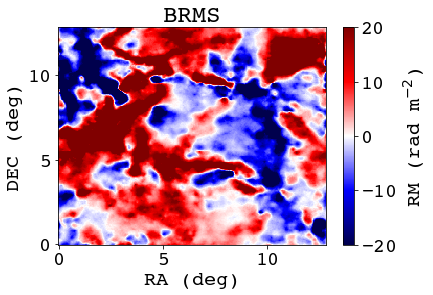

<Figure size 432x288 with 0 Axes>

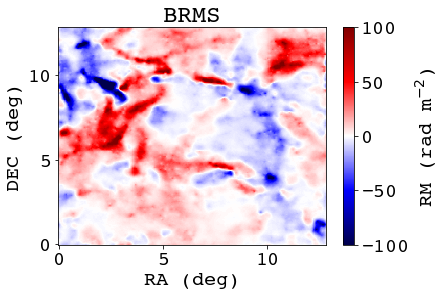

<Figure size 432x288 with 0 Axes>

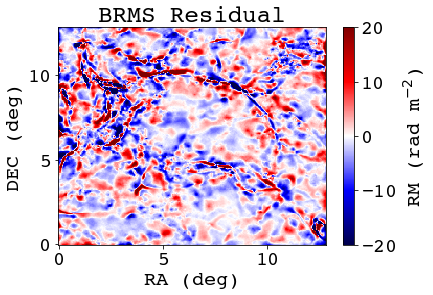

sampler: Iteration #0 energy=1.254223E+14 diff=1.254223E+14 crit=1.0E-07 clvl=0
sampler: Iteration #1 energy=2.245616E+13 diff=1.029662E+14 crit=1.0E-07 clvl=0
sampler: Iteration #2 energy=1.741374E+13 diff=5.042426E+12 crit=1.0E-07 clvl=0
sampler: Iteration #3 energy=1.522119E+13 diff=2.192543E+12 crit=1.0E-07 clvl=0
sampler: Iteration #4 energy=1.192973E+13 diff=3.291459E+12 crit=1.0E-07 clvl=0
sampler: Iteration #5 energy=8.358837E+12 diff=3.570897E+12 crit=1.0E-07 clvl=0
sampler: Iteration #6 energy=5.570138E+12 diff=2.788699E+12 crit=1.0E-07 clvl=0
sampler: Iteration #7 energy=4.349264E+12 diff=1.220874E+12 crit=1.0E-07 clvl=0
sampler: Iteration #8 energy=3.479047E+12 diff=8.702167E+11 crit=1.0E-07 clvl=0
sampler: Iteration #9 energy=2.648671E+12 diff=8.303759E+11 crit=1.0E-07 clvl=0
sampler: Iteration #10 energy=2.502087E+12 diff=1.465844E+11 crit=1.0E-07 clvl=0
sampler: Iteration #11 energy=2.059760E+12 diff=4.423265E+11 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=1.760159

Starting global iteration #0


sampler: Iteration #14 energy=1.594235E+12 diff=5.814934E+09 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=1.330338E+12 diff=2.638965E+11 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=1.176883E+12 diff=1.534547E+11 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=1.093449E+12 diff=8.343485E+10 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=9.335445E+11 diff=1.599041E+11 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=8.924092E+11 diff=4.113535E+10 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=7.994682E+11 diff=9.294099E+10 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=6.822816E+11 diff=1.171866E+11 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=6.142931E+11 diff=6.798858E+10 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=6.066749E+11 diff=7.618169E+09 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=6.011190E+11 diff=5.555883E+09 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=5.606541E+11 diff=4.046491E+10 crit=1.0E-07 clvl=0
sampler: Iteration #26 energ

Starting global iteration #1


sampler: Iteration #14 energy=-7.614512E+04 diff=1.154731E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.629258E+04 diff=1.474648E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.637699E+04 diff=8.440805E+01 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.638290E+04 diff=5.905398E+00 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.648042E+04 diff=9.752624E+01 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.661254E+04 diff=1.321197E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.661413E+04 diff=1.587975E+00 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.661780E+04 diff=3.670229E+00 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.671869E+04 diff=1.008894E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.675073E+04 diff=3.203737E+01 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.679477E+04 diff=4.404073E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.680278E+04 diff=8.012347E+00 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #2


sampler: Iteration #14 energy=-7.717774E+04 diff=7.882081E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.724751E+04 diff=6.977045E+01 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.724791E+04 diff=3.983822E-01 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.728003E+04 diff=3.211906E+01 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.730543E+04 diff=2.540117E+01 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.737803E+04 diff=7.259898E+01 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.739852E+04 diff=2.049367E+01 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.742048E+04 diff=2.196097E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.747772E+04 diff=5.723961E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.749617E+04 diff=1.845229E+01 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.750922E+04 diff=1.304599E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.754649E+04 diff=3.726785E+01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #3


sampler: Iteration #15 energy=-7.594125E+04 diff=2.642265E+01 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.604789E+04 diff=1.066429E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.614421E+04 diff=9.631369E+01 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.624561E+04 diff=1.014048E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.626994E+04 diff=2.432827E+01 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.635558E+04 diff=8.563821E+01 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.637498E+04 diff=1.940357E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.645442E+04 diff=7.944015E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.652213E+04 diff=6.770948E+01 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.662399E+04 diff=1.018613E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.669288E+04 diff=6.888906E+01 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.669378E+04 diff=9.000252E-01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #4


sampler: Iteration #11 energy=-7.447924E+04 diff=1.894641E+02 crit=1.0E-07 clvl=0
sampler: Iteration #12 energy=-7.481552E+04 diff=3.362794E+02 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-7.514322E+04 diff=3.277029E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-7.515890E+04 diff=1.567926E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.540565E+04 diff=2.467521E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.558510E+04 diff=1.794489E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.581292E+04 diff=2.278237E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.597246E+04 diff=1.595393E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.598400E+04 diff=1.154311E+01 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.608809E+04 diff=1.040846E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.620081E+04 diff=1.127181E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.634815E+04 diff=1.473455E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #5


sampler: Iteration #17 energy=-7.525777E+04 diff=2.330835E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.543039E+04 diff=1.726173E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.562379E+04 diff=1.934008E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.562872E+04 diff=4.931992E+00 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.569863E+04 diff=6.990969E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.575507E+04 diff=5.643598E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.593083E+04 diff=1.757618E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.597879E+04 diff=4.796537E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.608590E+04 diff=1.071094E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.621172E+04 diff=1.258199E+02 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.634758E+04 diff=1.358531E+02 crit=1.0E-07 clvl=0
sampler: Iteration #28 energy=-7.635189E+04 diff=4.317280E+00 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #6


sampler: Iteration #12 energy=-7.412513E+04 diff=5.392072E+02 crit=1.0E-07 clvl=0
sampler: Iteration #13 energy=-7.459266E+04 diff=4.675336E+02 crit=1.0E-07 clvl=0
sampler: Iteration #14 energy=-7.460780E+04 diff=1.513845E+01 crit=1.0E-07 clvl=0
sampler: Iteration #15 energy=-7.506184E+04 diff=4.540382E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.533451E+04 diff=2.726720E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.557947E+04 diff=2.449576E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.579599E+04 diff=2.165233E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.601026E+04 diff=2.142748E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.601404E+04 diff=3.775989E+00 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.614515E+04 diff=1.311066E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.618233E+04 diff=3.718629E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.627917E+04 diff=9.683615E+01 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #7


sampler: Iteration #15 energy=-7.467387E+04 diff=3.346076E+02 crit=1.0E-07 clvl=0
sampler: Iteration #16 energy=-7.491202E+04 diff=2.381541E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.516175E+04 diff=2.497331E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.535745E+04 diff=1.956943E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.554251E+04 diff=1.850596E+02 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.557088E+04 diff=2.837096E+01 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.570624E+04 diff=1.353640E+02 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.575648E+04 diff=5.023978E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.581814E+04 diff=6.166038E+01 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.590695E+04 diff=8.881171E+01 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.603339E+04 diff=1.264383E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.613826E+04 diff=1.048657E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #8


sampler: Iteration #16 energy=-7.554870E+04 diff=2.603774E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.582325E+04 diff=2.745432E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.602503E+04 diff=2.017854E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.605015E+04 diff=2.512031E+01 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.618903E+04 diff=1.388813E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.625754E+04 diff=6.850724E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.637510E+04 diff=1.175632E+02 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.641942E+04 diff=4.431286E+01 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.653670E+04 diff=1.172860E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.667053E+04 diff=1.338243E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.679962E+04 diff=1.290977E+02 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.694370E+04 diff=1.440773E+02 crit=1.0E-07 clvl=0
sampler: Iterati

Starting global iteration #9


sampler: Iteration #16 energy=-7.471257E+04 diff=2.305385E+02 crit=1.0E-07 clvl=0
sampler: Iteration #17 energy=-7.495674E+04 diff=2.441704E+02 crit=1.0E-07 clvl=0
sampler: Iteration #18 energy=-7.517623E+04 diff=2.194929E+02 crit=1.0E-07 clvl=0
sampler: Iteration #19 energy=-7.517918E+04 diff=2.948551E+00 crit=1.0E-07 clvl=0
sampler: Iteration #20 energy=-7.531786E+04 diff=1.386761E+02 crit=1.0E-07 clvl=0
sampler: Iteration #21 energy=-7.535727E+04 diff=3.941246E+01 crit=1.0E-07 clvl=0
sampler: Iteration #22 energy=-7.539352E+04 diff=3.624607E+01 crit=1.0E-07 clvl=0
sampler: Iteration #23 energy=-7.551992E+04 diff=1.264026E+02 crit=1.0E-07 clvl=0
sampler: Iteration #24 energy=-7.566574E+04 diff=1.458202E+02 crit=1.0E-07 clvl=0
sampler: Iteration #25 energy=-7.580523E+04 diff=1.394857E+02 crit=1.0E-07 clvl=0
sampler: Iteration #26 energy=-7.590064E+04 diff=9.541162E+01 crit=1.0E-07 clvl=0
sampler: Iteration #27 energy=-7.600719E+04 diff=1.065512E+02 crit=1.0E-07 clvl=0
sampler: Iterati

<Figure size 432x288 with 0 Axes>

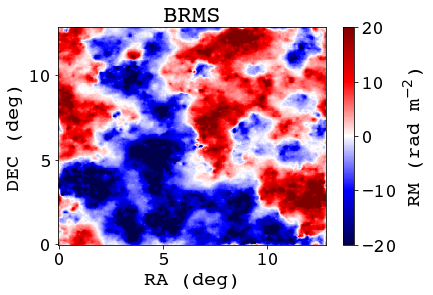

<Figure size 432x288 with 0 Axes>

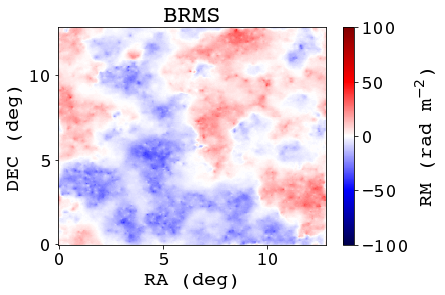

<Figure size 432x288 with 0 Axes>

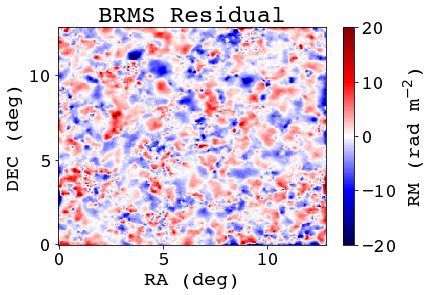

<Figure size 432x288 with 0 Axes>

In [7]:

from inference import main as inference
from Parameters import inference_parameters_template as pm2


ntheta_array = []
nphi_array = []


load_paths = ['./Data/simulated_cutout_fil/test/', './Data/simulated_cutout_patchy/test/']
pl.rcParams.update({'font.size': 20})
pl.rcParams["font.family"] = "Courier"


for path in load_paths:
    ntheta_array.append(np.load(path + 'theta.npy'))
    nphi_array.append(np.load(path + 'phi.npy'))

plot_path  = './Figs/'
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

def BRMS_plotting(locations, ntheta_array, nphi_array, simulation_paths, nx = 256, ny = 256, return_arrays = True):
        """  
        Function to test BRMS interpolation for a foreground RM sky

        Parameters
        ----------
        locations: List of strings that provides the directory in which the data is stored inside the director './Data'
        ntheta_array: Arrays of RA values of the data points
        nphi_array: Arrays of DEC values of the data points
        simulation_paths: List of strings that provides the path to the simulated foreground RM relative to the current directory
        epsilon: Float that controls the shape parameter; 1 by default 
        nx, ny: x and y shape of the inteprolation region; 256 x 256 by default 
        return_arrays: Boolean to control the return of data; True by default

        Returns
        --------
        val_BRMS_array: List of BRMS interpolation results for each grid
        """ 
        val_BRMS_array = []
        plot_path = './Figs/'

        if not os.path.exists(plot_path):
                os.makedirs(plot_path)

        for i in range(len(ntheta_array)):
                # Loading in the data
                ntheta = ntheta_array[i]
                nphi = nphi_array[i]
                simulation_path = simulation_paths[i]
                location = locations[i]

                fil_sim = np.load(simulation_path).transpose()

                fil_sim = np.fliplr(np.flipud(fil_sim[:nx, :ny]))

                x, y = np.linspace(ntheta.min(), ntheta.max(), nx), np.linspace(nphi.min(), nphi.max(), ny)

                # Performing the BRMS interpolation

                run_parameter_dict = getattr(pm2, 'run_params')
                domain_dict = getattr(pm2, 'domain_params')
                amp_dict = getattr(pm2, 'amplitude_params')
                sign_dict = getattr(pm2, 'sign_params')
                egal_dict = getattr(pm2, 'extragal_params')
                inference(**run_parameter_dict, location = location, amplitude_params=amp_dict, sign_params=sign_dict,
                        extragal_params=egal_dict, domain_parameters=domain_dict)
                
                val_BRMS = np.load("Runs/results/test/faraday_sky_mean.npy")
                val_BRMS = (np.transpose(val_BRMS))

                if 'patchy' in location: 
                        np.save('./Results/Patchy_Sky/BRMS.npy', val_BRMS)
                        grid_name = 'patchy'

                elif 'fil' in location: 
                        np.save('./Results/Fil_Sky/BRMS.npy', val_BRMS)
                        grid_name = 'fil'

                else: 
                        np.save('./Results/Example/BRMS.npy', val_BRMS)
                        grid_name = 'example'

                # Plotting BRMS
                val_min, val_max = -20, 20

        
                funcx, funcy = np.meshgrid(x, y)

                fig1, ax1 = pl.subplots()
                pl.title("BRMS")  

                c1 = ax1.pcolormesh(funcx, funcy, val_BRMS, cmap='seismic', vmin=val_min, vmax=val_max)

                colorbar1 = fig1.colorbar(c1, ax = ax1)
                colorbar1.set_label('RM (rad m$^{-2}$)')
                ax1.set_xlabel('RA (deg)')
                ax1.set_ylabel('DEC (deg)')
                ax1.set_yticks((0, 5, 10))
                pl.savefig(plot_path+"BRMS_{}_small.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
                pl.show()

                fig2, ax2 = pl.subplots()
                pl.title("BRMS")

                val_min, val_max = -100, 100
                c2 = ax2.pcolormesh(funcx, funcy, val_BRMS, cmap='seismic', vmin=val_min, vmax=val_max)

                colorbar2 = fig2.colorbar(c2, ax = ax2)
                colorbar2.set_label('RM (rad m$^{-2}$)')
                ax2.set_xlabel('RA (deg)')
                ax2.set_ylabel('DEC (deg)')
                ax2.set_yticks((0, 5, 10))
                pl.savefig(plot_path+"BRMS_{}_big.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
                pl.show()

                fig3, ax3 = pl.subplots()
                pl.title("BRMS Residual")

                val_min, val_max = -20, 20
                c3 = ax3.pcolormesh(funcx, funcy, fil_sim-val_BRMS, cmap='seismic', vmin=val_min, vmax=val_max)
                colorbar3 = fig3.colorbar(c3, ax = ax3)
                colorbar3.set_label('RM (rad m$^{-2}$)')
                ax3.set_xlabel('RA (deg)')
                ax3.set_ylabel('DEC (deg)')
                ax3.set_yticks((0, 5, 10))
                pl.savefig(plot_path+"BRMS_{}_res.png".format(grid_name), dpi = 300, bbox_inches = 'tight')
                pl.show()


                val_BRMS_array.append(val_BRMS)

        if return_arrays:
                return val_BRMS_array
        else: 
                return
locations = ['simulated_cutout_fil', 'simulated_cutout_patchy']
val_BRMS_array = BRMS_plotting(locations, ntheta_array, nphi_array, simulation_paths)

## Analysis

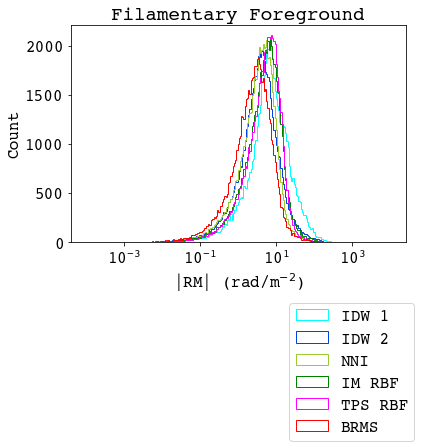

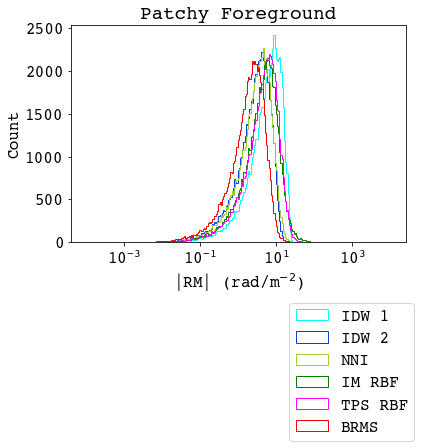

In [12]:
# Here we will plot the histogram 
import copy


def Plotting_Historgram(interpol_names, interpol_paths, simulation_paths): 
    ''' 
    Function to plot the power spectra of the interpolated RM maps
    Parameters
    ----------
    interpol_names: List of strings containing the names of the interpolation schemes
    interpol_paths: List of strings containing the paths to the interpolated RM maps 
    simulation_paths: List of strings containing the paths to the simulated foreground RMs

    Returns
    --------
    None
    '''
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"
    # Loading in the interpolated RM maps 
    val_arrays = [[], []]

    grid_names = ['fil', 'patchy']
    simulation_names = ['Results_Filamentary', 'Results_Patchy']
    simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
    
    for i in range(len(grid_names)): 
        simulation_path = simulation_paths[i]
        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:256, :256]))
        val_arrays[i].append(fil_sim)

    val_NNI_array = []
    for j in range(len(interpol_paths)):
        path = interpol_paths[j]
        for i in range(len(interpol_names)):
            name = interpol_names[i]
            val_arrays[j].append(np.load(  path + name +'.npy'))
            if name == 'NNI': 
                val_NNI_array.append(np.load(  path + name +'.npy'))

    # Here, we will remove all points where NNI obtains nan values from all the arrays for fair comparison 

    def remove_nan(val, i): 
        val_nan_array = copy.deepcopy(val)
        val_nan_array = val_nan_array[~np.isnan(val_NNI_array[i])] 

        return val_nan_array

    grid_names = ['fil', 'patchy']
    plot_grids = ['Filamentary Foreground', 'Patchy Foreground']
    mean_res_array = [[], []]
    std_res_array = [[], []]
    colors = ['#00FFFF', '#0343DF', '#9ACD32', '#008000', '#FF00FF', '#FF0000']
    for i in range(len(grid_names)): 
        grid_name = grid_names[i]
        val_grid_array = val_arrays[i]

        fig, ax = pl.subplots()
        for j in range(1, len(val_grid_array)):
            val_array = val_grid_array[j]

            interpol_name = interpol_names[j-1] 
            if interpol_name[:3] == "IDW": 
                plot_name = interpol_name[:3] + " " + interpol_name[3:]

            elif 'IM' in interpol_name or 'TPS' in interpol_name:
                plot_name = interpol_name + " RBF"

            else:
                plot_name = interpol_name
            

            val_nan_array = remove_nan(val_array, i)
            bins = np.logspace(-4, 4, 256)
            ax.hist((np.abs(remove_nan(val_grid_array[0], i) - val_nan_array)), bins, histtype = 'step', label = plot_name, color = colors[j-1])
            mean_res_array[i].append(np.mean((np.abs(remove_nan(val_grid_array[0], i) - val_nan_array))))
            std_res_array[i].append(np.std((np.abs(remove_nan(val_grid_array[0], i) - val_nan_array))))

            #ax.hist(np.ravel(np.abs(val_grid_array[0] - val_array)), bins, histtype = 'step', label = plot_name, color = colors[j-1])
            #mean_res_array[i].append(np.mean(np.ravel(np.abs(val_grid_array[0] - val_array))))
            #std_res_array[i].append(np.std(np.ravel(np.abs(val_grid_array[0] - val_array))))

     
        ax.set_title(plot_grids[i])
        #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.legend(bbox_to_anchor = (1.05, -0.95), loc='lower right')
        ax.set_xlabel('|RM| (rad/m$^{-2}$)')
        ax.set_ylabel('Count')
        ax.set_xscale('log')
        pl.savefig('./Figs/' + grid_name + '_hist.png', dpi = 300, bbox_inches = 'tight')
        pl.show()
    return mean_res_array, std_res_array

interpol_names = ['IDW1', 'IDW2', 'NNI', 'IM', 'TPS', 'BRMS']

interpol_paths = ['./Results/Fil_Sky/', './Results/Patchy_Sky/']
simulation_names = ['Results_Filamentary', 'Results_Patchy']
simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']

mean_res_array, std_res_array = Plotting_Historgram(interpol_names, interpol_paths, simulation_paths)


In [36]:
mean_res_array

[[11.99098836165648,
  6.613098071136193,
  5.239948688360425,
  7.218381038671986,
  6.923127824733195,
  4.173280757831617],
 [7.039780327958478,
  3.5564034415330035,
  3.814797806212009,
  5.9692589167032954,
  5.8169026294239385,
  2.538101275124356]]

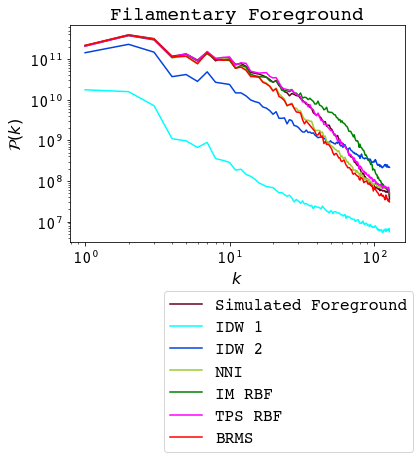

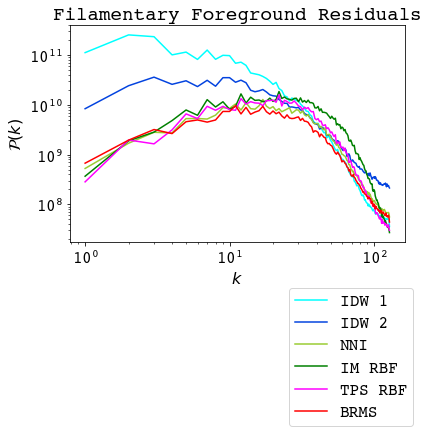

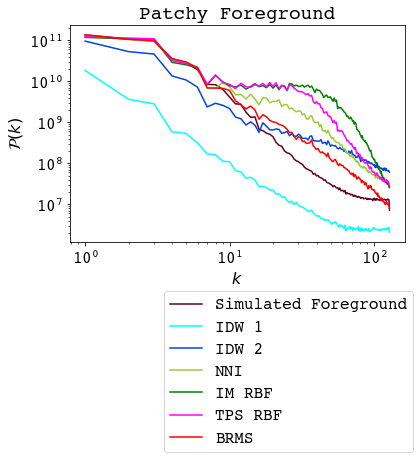

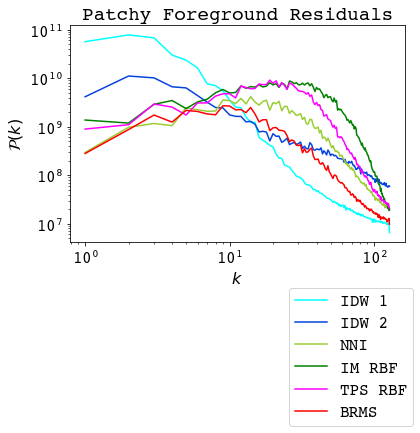

In [5]:
# Here, we will plot the power spectra

import scipy.stats as stats
import copy

def Plotting_Power_Spectrum(interpol_names, interpol_paths):
    ''' 
    Function to plot the power spectra of the interpolated RM maps
    Parameters
    ----------
    interpol_names: List of strings containing the names of the interpolation schemes
    interpol_paths: List of strings containing the paths where the interpolated RM maps are stored 

    
    Returns
    --------
    None
    '''
    pl.rcParams.update({'font.size': 16})
    pl.rcParams["font.family"] = "Courier"
    # Loading in the interpolated RM maps 
    val_arrays = [[], []]
    integrals_array = []

    grid_names = ['fil', 'patchy']
    simulation_names = ['Results_Filamentary', 'Results_Patchy']
    simulation_paths = ['../Simulations/' + simulation_names[0]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy', '../Simulations/' + simulation_names[1]+ '/all_boxes_sim_nth_sim_b_gaussian_dir0/RM.npy']
    
    for i in range(len(grid_names)): 
        simulation_path = simulation_paths[i]
        fil_sim = np.load(simulation_path).transpose()

        fil_sim = np.fliplr(np.flipud(fil_sim[:256, :256]))
        val_arrays[i].append(fil_sim)

    val_NNI_array = []
    for j in range(len(interpol_paths)):
        path = interpol_paths[j]
        for i in range(len(interpol_names)):
            name = interpol_names[i]
            val_arrays[j].append(np.load(  path + name +'.npy'))
            if name == 'NNI': 
                val_NNI_array.append(np.load(  path + name +'.npy'))


    # Here, we will remove all points where NNI obtains nan values from all the arrays for fair comparison 

    def remove_nan(val, i): 
        val_nan_array = copy.deepcopy(val)
        val_nan_array[np.isnan(val_NNI_array[i])] = 0

        return val_nan_array



    def Power_Spectrum(val):
        """
        Function to plot the Fourier power spectrum. Code modified from Bert Vanderbrouke, Universiteit Leiden. 

        Parameters
        ----------
        val: An array of the RM values
        name: A string that stores the name of the RM grid 

        Returns
        --------
        None
        """
        npix = val.shape[0]

        fourier_val = np.fft.fftn(val)
        fourier_amplitudes = np.abs(fourier_val)**2

        kfreq = np.fft.fftfreq(npix) * npix
        kfreq2D = np.meshgrid(kfreq, kfreq)
        knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

        knrm = knrm.flatten()
        fourier_amplitudes = fourier_amplitudes.flatten()

        kbins = np.arange(0.5, npix//2+1, 1.)
        kvals = 0.5 * (kbins[1:] + kbins[:-1])
        amp_bins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes, statistic = "mean", bins = kbins)
        amp_bins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)
        return kvals, amp_bins
    colors = ['#650021', '#00FFFF', '#0343DF', '#9ACD32', '#008000', '#FF00FF', '#FF0000']
    plot_grids = ['Filamentary Foreground', 'Patchy Foreground']
    for i in range(len(grid_names)): 
        grid_name = grid_names[i]
        val_grid_array = val_arrays[i]
        integrals = []
        fig, ax = pl.subplots()
        fig2, ax2 = pl.subplots()
        for j in range(len(val_grid_array)):
            val_array = val_grid_array[j]
            if j == 0:
                interpol_name = 'Simulated Foreground'
            else:
                interpol_name = interpol_names[j-1] 

            if interpol_name[:3] == "IDW": 
                plot_name = interpol_name[:3] + " " + interpol_name[3:]

            elif 'IM' in interpol_name or 'TPS' in interpol_name:
                plot_name = interpol_name + " RBF"

            else:
                plot_name = interpol_name
            

            val_nan_array = remove_nan(val_array, i)
            kvals, amp_bins = Power_Spectrum(val_nan_array)


            ax.plot(kvals, amp_bins, label = plot_name, color = colors[j])
            
            if j >= 1:
                kvals_res, amp_bins_res = Power_Spectrum(remove_nan(val_grid_array[0], i) - val_nan_array)
                integral_res = np.trapz(amp_bins_res / np.array(kvals_res), kvals_res)
                integrals.append(integral_res)
                ax2.plot(kvals_res, amp_bins_res, label = plot_name, color = colors[j])
        integrals_array.append(integrals)
     
        ax.set_title(plot_grids[i])
        ax.legend(bbox_to_anchor = (1.05, -1), loc='lower right')
        ax.loglog()
        ax.set_xlabel('$k$')
        ax.set_ylabel('$\mathcal{P}(k)$')
        fig.savefig('./Figs/' + grid_name + '_power.png', bbox_inches = 'tight')

        ax2.set_title(plot_grids[i] + ' Residuals')
        ax2.legend(bbox_to_anchor = (1.05, -0.88), loc = 'lower right')
        ax2.loglog()
        ax2.set_xlabel('$k$')
        ax2.set_ylabel('$\mathcal{P}(k)$')
        fig2.savefig('./Figs/' + grid_name + '_power_res.png', bbox_inches = 'tight')
      
    return integrals_array
interpol_names = ['IDW1', 'IDW2', 'NNI', 'IM', 'TPS', 'BRMS']

interpol_paths = ['./Results/Fil_Sky/', './Results/Patchy_Sky/']

integrals_array = Plotting_Power_Spectrum(interpol_names = interpol_names, interpol_paths = interpol_paths)